# THOMAS NGO
# TEVIN VU
# PROJECT 5

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras.activations import relu, sigmoid, tanh, softmax
from keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout, Activation, ReLU
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import GridSearchCV

### 1. Use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

In [ ]:
datasets = np.load('emnist_letters.npz')
train_images, train_labels  = datasets['train_images'], datasets['train_labels']
test_images, test_labels = datasets['test_images'], datasets['test_labels']
validate_images, validate_labels = datasets['validate_images'], datasets['validate_labels']
dataset_shape = datasets['train_images'].shape

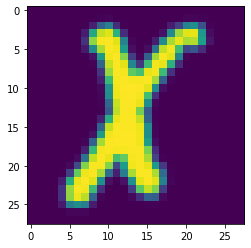

In [ ]:
plt.imshow(train_images[5435].reshape(28,28))

In [ ]:
print(chr(np.argmax(train_labels[5435]) - 1 + ord('A')))
# print(chr(np.argmax(datasets['train_labels'][0]) - 1 + ord('A')))

X


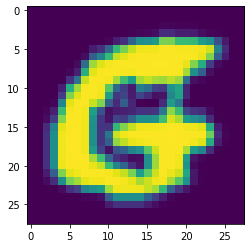

In [ ]:
plt.imshow(train_images[1].reshape(28,28))

In [ ]:
print(train_labels.shape)


(104000, 27)


In [ ]:
print(chr(np.argmax(train_labels[1]) - 1 + ord('A')))

G


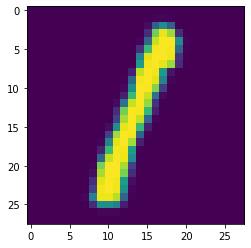

In [ ]:
plt.imshow(validate_images[1].reshape(28,28))

In [ ]:
print(chr(np.argmax(validate_labels[1]) - 1 + ord('A')))

L


In [ ]:
print(validate_labels.shape)
print(validate_images.shape)

(20800, 27)
(20800, 784)


### 2. Begin by applying the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. What accuracy do you achieve? How does this compare with the accuracy for MNIST?. 

In [ ]:
train_images.shape

(104000, 784)

In [ ]:
test_images.shape

(20800, 784)

In [ ]:
len(train_labels)

104000

In [ ]:
test_labels.shape

(20800, 27)

In [ ]:
len(test_labels)

20800

In [ ]:
test_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
network = models.Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(27, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)
network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(validate_images,validate_labels))

Epoch 1/5
813/813 [==============================] - 3s 3ms/step - loss: 1.0746 - accuracy: 0.6903 - val_loss: 0.4644 - val_accuracy: 0.8600
Epoch 2/5
813/813 [==============================] - 3s 3ms/step - loss: 0.4042 - accuracy: 0.8770 - val_loss: 0.3737 - val_accuracy: 0.8851
Epoch 3/5
813/813 [==============================] - 3s 3ms/step - loss: 0.3040 - accuracy: 0.9033 - val_loss: 0.3365 - val_accuracy: 0.8982
Epoch 4/5
813/813 [==============================] - 3s 3ms/step - loss: 0.2572 - accuracy: 0.9170 - val_loss: 0.3505 - val_accuracy: 0.8965
Epoch 5/5
813/813 [==============================] - 3s 3ms/step - loss: 0.2265 - accuracy: 0.9252 - val_loss: 0.3360 - val_accuracy: 0.9005


In [ ]:
test_lost, test_acc = network.evaluate(test_images, test_labels) #run this

650/650 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8997


In [ ]:
print('Test Accuracy: ', test_acc) #run this
orginal_model_acc = test_acc

Test Accuracy:  0.8996634483337402


### 3. Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:
- There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.
- In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.
- The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.

In [ ]:
#run this
model = models.Sequential()
model.add(Dense(10000, activation='relu', input_shape=(28*28,)))
model.add(Dense(27, activation='softmax'))

In [ ]:
#run this
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(validate_images,validate_labels))

Epoch 1/5
813/813 [==============================] - 6s 7ms/step - loss: 0.9372 - accuracy: 0.7334 - val_loss: 0.4274 - val_accuracy: 0.8678
Epoch 2/5
813/813 [==============================] - 5s 6ms/step - loss: 0.3206 - accuracy: 0.8977 - val_loss: 0.3796 - val_accuracy: 0.8886
Epoch 3/5
813/813 [==============================] - 5s 6ms/step - loss: 0.2508 - accuracy: 0.9187 - val_loss: 0.3945 - val_accuracy: 0.8917
Epoch 4/5
813/813 [==============================] - 5s 6ms/step - loss: 0.2146 - accuracy: 0.9306 - val_loss: 0.4169 - val_accuracy: 0.8946
Epoch 5/5
813/813 [==============================] - 5s 6ms/step - loss: 0.1902 - accuracy: 0.9381 - val_loss: 0.4226 - val_accuracy: 0.8997


In [ ]:
test_lost, test_acc = model.evaluate(test_images, test_labels) #run this

650/650 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.9006


What accuracy do you achieve?

In [ ]:
print('Test Accuracy: ', test_acc) #run this
modified_org_model_acc = test_acc

Test Accuracy:  0.9005769491195679


How does this compare with the accuracy for MNIST? 
- This accuracy is greater than MNIST a little bit.

### 4. Once you have settled on the size of the hidden layer, use the techniques you learned in Chapters 3 and 4 of the textbook to obtain the highest accuracy you can on the validation set. These might include:

  - Preprocessing
  - Weight initialization
  - Choice of activation function
  - Optimizer
  - Batch Normalization
  - Regularization
  - Data augmentation
  - Dropout
  - Early Stopping

You may find the slides for Chapter 3 helpful, particularly the presentation “Neural Network Training [Initialization, Preprocessing, Mini-Batching, Tuning, and Other Black Art].”

In [ ]:
# Preprocessing data input(run this)

# using sklearn min-max scaler
# train_images = minmax_scale(train_images)
# test_images = minmax_scale(test_images)

# using sklearn standard scaler
X_scaler = StandardScaler().fit(train_images)
train_images = X_scaler.transform(train_images)
Y_scaler = StandardScaler().fit(test_images)
test_images = Y_scaler.transform(test_images)

# attempting to implement min-max scaling, problem with invalid division when max and min are zeroes, ask professor
# max_mat = train_images.max(axis=0)
# min_mat = train_images.min(axis=0)
# print(max_mat.shape)
# print(min_mat.shape)
# train_images -= min_mat
# train_images /= (max_mat - min_mat)
# print(f'max_mat: {max_mat}')
# print(f'min_mat: {min_mat}')

# attempting to implement standardization, same problem with implemenation of min-max scaling
# mean = train_images.mean(axis=0)
# train_images -= mean
# print('train_images after subtracing mean: {train_images}')
# std = train_images.std(axis=0)
# # std = np.sqrt(2/(784+37))
# print(f'std: {std}')
# train_images /= std
# test_images -= mean
# test_images /= std

In [ ]:
# define model with batch normalization
def define_model(func_name='relu', 
                 kernel_initializer='glorot_normal', 
                 batch_size=128,
                 epochs=5,
                 optimizer='rmsprop'):
  # build model
  model = models.Sequential()
  model.add(Dense(1000,
                  kernel_initializer=kernel_initializer,
                  use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation(func_name))
  model.add(Dense(27, activation='softmax'))
  # compile mode
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# create params dictionary for gridsearch
func_names = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad']
kernel_initializers= ['glorot_uniform', 'glorot_normal']
batch_sizes = [128, 256, 512]
parmam_grid = dict(optimizer=optimizers, 
                   func_name=func_names, 
                   batch_size=batch_sizes, 
                   kernel_initializer=kernel_initializers)
print(parmam_grid)

{'optimizer': ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad'], 'func_name': ['relu', 'tanh', 'sigmoid'], 'batch_size': [128, 256, 512], 'kernel_initializer': ['glorot_uniform', 'glorot_normal']}


In [ ]:
# create model
model = KerasClassifier(build_fn=define_model)

# perform gridsearch
grid = GridSearchCV(estimator=model, param_grid=parmam_grid, verbose=1)
grid_res = grid.fit(train_images, train_labels)

print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


41/41 [==============================] - 0s 4ms/step - loss: 3.0282 - accuracy: 0.2084


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 17.1min finished


813/813 [==============================] - 3s 3ms/step - loss: 0.8941 - accuracy: 0.7384
Best accuracy: 0.8546826958656311 using {'batch_size': 128, 'func_name': 'relu', 'kernel_initializer': 'glorot_normal', 'optimizer': 'rmsprop'}


In [ ]:
print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Best accuracy: 0.8546826958656311 using {'batch_size': 128, 'func_name': 'relu', 'kernel_initializer': 'glorot_normal', 'optimizer': 'rmsprop'}


In [ ]:
# define model with dropout
def define_model_2(func_name='relu', 
                   kernel_initializer='glorot_normal', 
                   batch_size=128,
                   epochs=100,
                   dropout_rate=0.5,
                   optimizer='rmsprop'):
    # build model
    model = models.Sequential()
    model.add(Dense(1000,
                    activation=func_name,
                    kernel_initializer=kernel_initializer,
                    use_bias=True))
    model.add(Dense(27, activation='softmax'))
    model.add(Dropout(dropout_rate))
    # compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# create params dictionary for gridsearch
func_names = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad']
kernel_initializers= ['glorot_uniform', 'glorot_normal']
batch_sizes = [128, 256, 512]
dropout_rates = [0.2, 0.5]
parmam_grid = dict(optimizer=optimizers, 
                   func_name=func_names, 
                   batch_size=batch_sizes,
                   dropout_rate=dropout_rates,
                   kernel_initializer=kernel_initializers)
print(parmam_grid)

{'optimizer': ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad'], 'func_name': ['relu', 'tanh', 'sigmoid'], 'batch_size': [128, 256, 512], 'dropout_rate': [0.2, 0.5], 'kernel_initializer': ['glorot_uniform', 'glorot_normal']}


In [ ]:
# create model
model = KerasClassifier(build_fn=define_model_2)

# perform gridsearch
grid = GridSearchCV(estimator=model, param_grid=parmam_grid, verbose=1)
grid_res = grid.fit(train_images, train_labels)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


41/41 [==============================] - 0s 4ms/step - loss: 3.2041 - accuracy: 0.0855


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 30.4min finished


407/407 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5598


In [ ]:
print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Best accuracy: 0.8300673007965088 using {'batch_size': 256, 'dropout_rate': 0.2, 'func_name': 'relu', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'adam'}


In [ ]:
# building model (run this)
model = models.Sequential()
model.add(Dense(10000,
                # activation=LeakyReLU(alpha=0.01), 
                # activation='relu',
                input_shape=(28*28,),
                kernel_initializer='glorot_normal',
                # kernel_regularizer=l2(0.01),
                use_bias=False)) # set False if BatchNormalization is used and remove dropout
model.add(BatchNormalization()) # pre-activation normalization
model.add(LeakyReLU(alpha=0.01))
# model.add(Activation(relu))
# model.add(Dropout(0.2)) # don't use this when using with BatchNormalization??
model.add(Dense(27, activation='softmax'))

In [ ]:
# compile model (run this)
model.compile(
    optimizer='adam',
              # optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', 
                         patience=10,
                        #  restore_best_weights=False)
                         restore_best_weights=True)

model.fit(train_images, 
          train_labels, 
          epochs=1000, 
          batch_size=256, 
          # batch_size=128,
          validation_data=(validate_images,validate_labels),
          callbacks=[callback],
          verbose=1)

Epoch 1/1000
407/407 [==============================] - 4s 8ms/step - loss: 1.3640 - accuracy: 0.7163 - val_loss: 1.4722 - val_accuracy: 0.5294
Epoch 2/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.4541 - accuracy: 0.8669 - val_loss: 1.2590 - val_accuracy: 0.6009
Epoch 3/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.3505 - accuracy: 0.8915 - val_loss: 1.2401 - val_accuracy: 0.6400
Epoch 4/1000
407/407 [==============================] - 3s 7ms/step - loss: 0.2883 - accuracy: 0.9060 - val_loss: 1.2814 - val_accuracy: 0.6009
Epoch 5/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.2324 - accuracy: 0.9220 - val_loss: 1.2181 - val_accuracy: 0.6281
Epoch 6/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.2094 - accuracy: 0.9295 - val_loss: 1.2750 - val_accuracy: 0.6185
Epoch 7/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.1893 - accuracy: 0.9356 - val_loss: 1.2667 - val_accuracy:

In [ ]:
# run model against TEST SET (this)
test_lost, test_acc = model.evaluate(test_images, test_labels)

# get accuracy
print('Test Accuracy: ', test_acc)
modified_model_acc = test_acc

650/650 [==============================] - 2s 2ms/step - loss: 0.8967 - accuracy: 0.9074
Test Accuracy:  0.907403826713562


In [ ]:
(modified_model_acc - modified_org_model_acc)*100 #run this

0.6826877593994141

### 5. Add additional Dense hidden layers as appropriate to improve the accuracy. Note that you may need to adjust your hyperparameters or other aspects of the network architecture in response to these changes. How does the accuracy for your deep network compare with the accuracy you achieved in experiment (4)?. 


In [ ]:
# build model
model = models.Sequential()
model.add(Dense(10000,
                input_shape=(28*28,),
                kernel_initializer='glorot_normal',
                # kernel_regularizer=l2(0.01),
                use_bias=False)) # set False if BatchNormalization is used and remove dropout
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(10000,
                input_shape=(28*28,),
                use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(10000,
#                 input_shape=(28*28,),
#                 use_bias=False))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.01))
model.add(Dense(27, activation='softmax'))

In [ ]:
# compile model (run this)
model.compile(
    optimizer='adam',
              # optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', 
                         patience=10,
                        #  restore_best_weights=False)
                         restore_best_weights=True)

model.fit(train_images, 
          train_labels, 
          epochs=1000, 
          batch_size=256, 
          # batch_size=128,
          validation_data=(validate_images,validate_labels),
          callbacks=[callback],
          verbose=1)

Epoch 1/1000
407/407 [==============================] - 27s 66ms/step - loss: 1.5307 - accuracy: 0.7140 - val_loss: 4.6738 - val_accuracy: 0.2919
Epoch 2/1000
407/407 [==============================] - 27s 65ms/step - loss: 0.4296 - accuracy: 0.8713 - val_loss: 7.4929 - val_accuracy: 0.1975
Epoch 3/1000
407/407 [==============================] - 26s 64ms/step - loss: 0.3192 - accuracy: 0.8989 - val_loss: 8.2673 - val_accuracy: 0.2452
Epoch 4/1000
407/407 [==============================] - 26s 65ms/step - loss: 0.2498 - accuracy: 0.9175 - val_loss: 9.1167 - val_accuracy: 0.1938
Epoch 5/1000
407/407 [==============================] - 26s 65ms/step - loss: 0.2248 - accuracy: 0.9242 - val_loss: 11.8718 - val_accuracy: 0.1542
Epoch 6/1000
407/407 [==============================] - 26s 64ms/step - loss: 0.1931 - accuracy: 0.9325 - val_loss: 11.2022 - val_accuracy: 0.1965
Epoch 7/1000
407/407 [==============================] - 26s 64ms/step - loss: 0.1672 - accuracy: 0.9403 - val_loss: 12.050

In [ ]:
# run model against TEST SET
test_lost, test_acc = model.evaluate(test_images, test_labels)

# get accuracy
print('Test Accuracy: ', test_acc)
deep_net_model_acc = test_acc

650/650 [==============================] - 3s 4ms/step - loss: 0.8041 - accuracy: 0.9186
Test Accuracy:  0.9185577034950256


In [ ]:
print(f'Improvement/Loss accuracy: {(deep_net_model_acc - modified_org_model_acc)*100}')

Improvement/Loss accuracy: 1.7980754375457764


### 6. When finished tuning, evaluate your results on the test set. Compare the test performance of your original network from experiment (2) and the final networks for experiments (3) and (4).

In [ ]:
print(f"Test accuracy of experience (2): {orginal_model_acc}")
print(f"Test accuracy of experience (3): {modified_org_model_acc}")
print(f"Test accuracy of experience (4): {modified_model_acc}")
print(f"Test accuracy of experience (5): {deep_net_model_acc}")

Test accuracy of experience (2): 0.8996634483337402
Test accuracy of experience (3): 0.9005769491195679
Test accuracy of experience (4): 0.907403826713562
